In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df = pd.read_csv('Resources/final_data_prep.csv')

In [20]:
df.head()

,date,state,actuals.hospitalBeds.currentUsageCovid,actuals.newCases,metrics.infectionRate,metrics.vaccinationsCompletedRatio,actuals.newDeaths,metrics.weeklyNewCasesPer100k,metrics.bedsWithCovidPatientsRatio,actuals.hospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.canCommunityLevel,state_name,population
0,2021-03-01,AK,25.0,383.0,0.99,0.000,10.0,124.8,0.02,25.0,3.4,0.0,Alaska,724357.0
1,2021-03-02,AK,27.0,154.0,0.99,0.000,1.0,138.3,0.02,23.0,3.1,0.0,Alaska,724357.0
2,2021-03-03,AK,34.0,191.0,0.99,0.000,1.0,140.0,0.02,26.0,3.6,0.0,Alaska,724357.0
3,2021-03-04,AK,32.0,148.0,0.99,0.000,0.0,134.9,0.02,24.0,3.3,0.0,Alaska,724357.0
4,2021-03-05,AK,36.0,148.0,0.99,0.146,1.0,140.0,0.02,25.0,3.4,0.0,Alaska,724357.0


In [26]:
df.drop(['date'],axis = 1).corr()

,actuals.hospitalBeds.currentUsageCovid,actuals.newCases,metrics.infectionRate,metrics.vaccinationsCompletedRatio,actuals.newDeaths,metrics.weeklyNewCasesPer100k,metrics.bedsWithCovidPatientsRatio,actuals.hospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.canCommunityLevel,population
actuals.hospitalBeds.currentUsageCovid,1.000000,0.629928,-0.093191,0.165708,0.542277,0.375515,0.585989,0.982185,0.494884,0.359831,0.677705
actuals.newCases,0.629928,1.000000,0.025687,0.182227,0.380810,0.472414,0.425052,0.661661,0.371716,0.261346,0.360231
metrics.infectionRate,-0.093191,0.025687,1.000000,0.005115,-0.166531,-0.035158,-0.125886,-0.076530,-0.093719,-0.049375,-0.019983
metrics.vaccinationsCompletedRatio,0.165708,0.182227,0.005115,1.000000,0.084510,0.347216,0.340212,0.159893,0.241867,0.361972,0.042737
actuals.newDeaths,0.542277,0.380810,-0.166531,0.084510,1.000000,0.154680,0.311053,0.502742,0.238379,0.197446,0.418798
metrics.weeklyNewCasesPer100k,0.375515,0.472414,-0.035158,0.347216,0.154680,1.000000,0.751281,0.413572,0.746682,0.589587,-0.018639
metrics.bedsWithCovidPatientsRatio,0.585989,0.425052,-0.125886,0.340212,0.311053,0.751281,1.000000,0.583397,0.882024,0.771357,0.096997
actuals.hospitalBeds.weeklyCovidAdmissions,0.982185,0.661661,-0.076530,0.159893,0.502742,0.413572,0.583397,1.000000,0.544934,0.370718,0.631850
metrics.weeklyCovidAdmissionsPer100k,0.494884,0.371716,-0.093719,0.241867,0.238379,0.746682,0.882024,0.544934,1.000000,0.749927,0.005955
communityLevels.canCommunityLevel,0.359831,0.261346,-0.049375,0.361972,0.197446,0.589587,0.771357,0.370718,0.749927,1.000000,-0.034105


In [55]:
vaccination_data = df[['state','date','metrics.vaccinationsCompletedRatio']]

In [56]:
vaccination_data.set_index('date',inplace = True)


C:\Users\shubh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


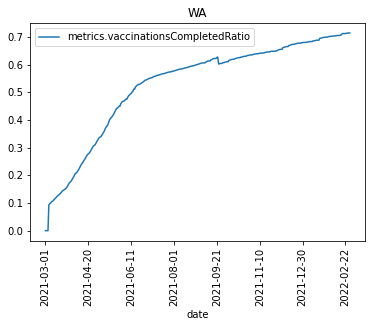

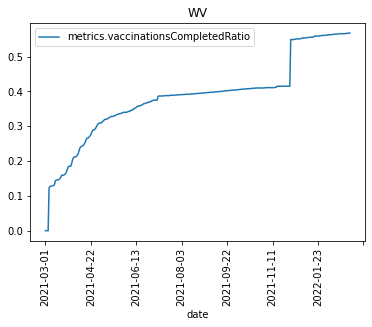

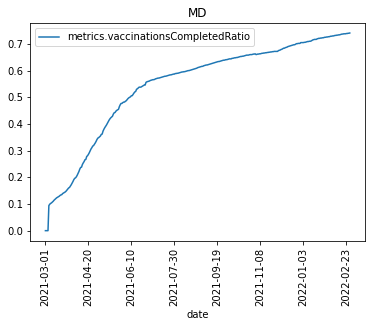

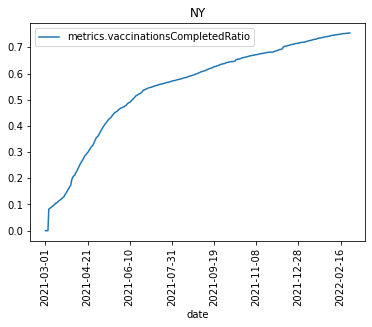

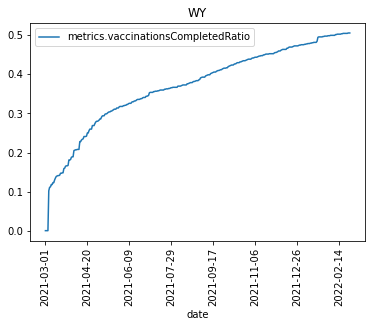

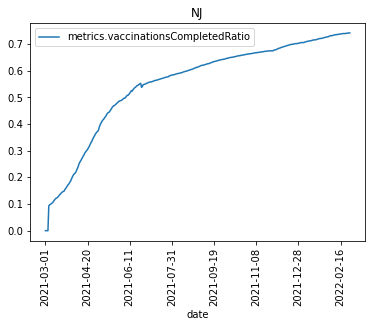

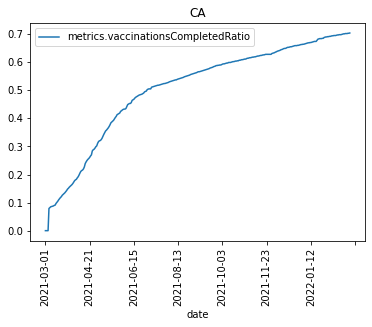

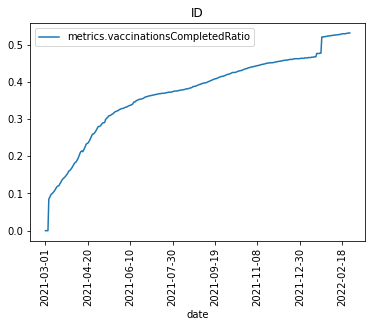

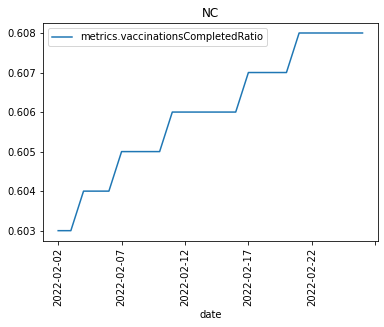

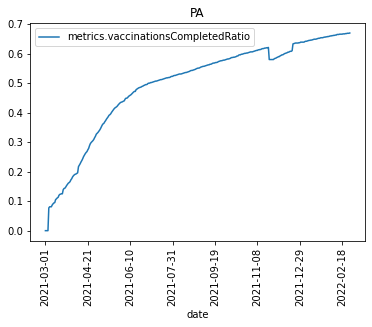

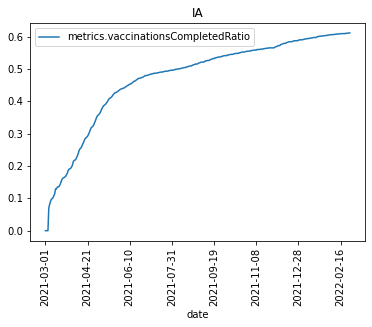

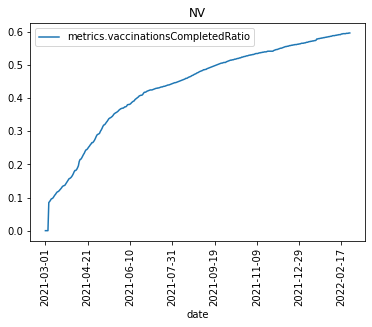

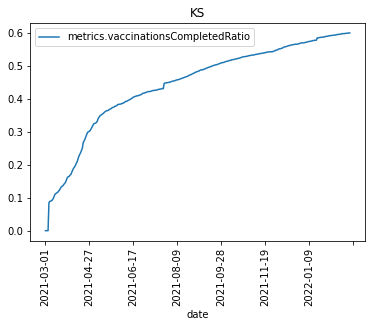

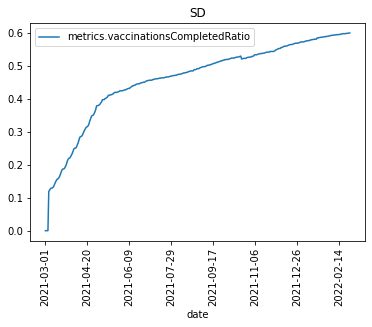

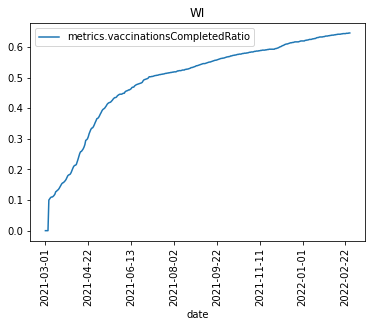

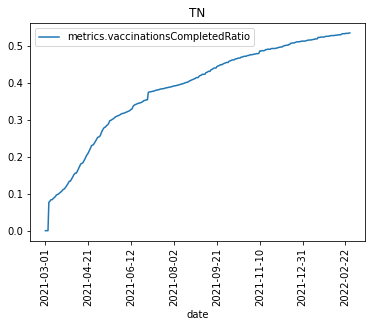

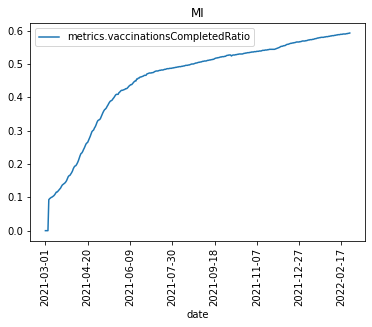

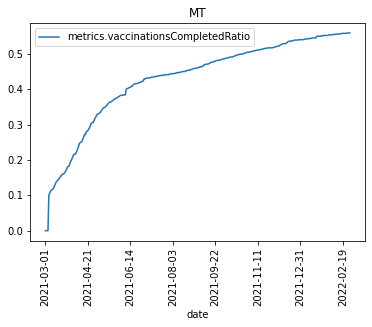

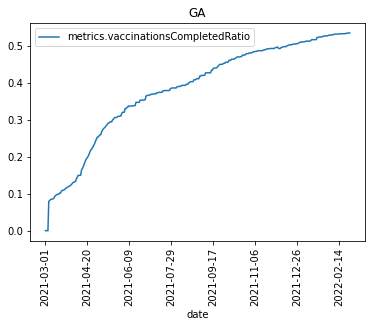

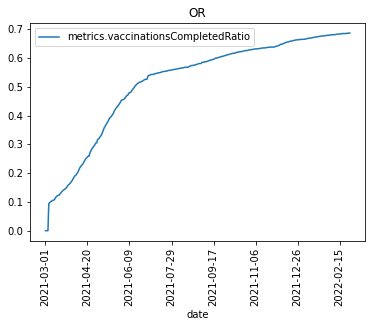

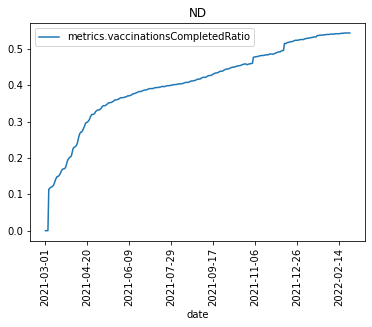

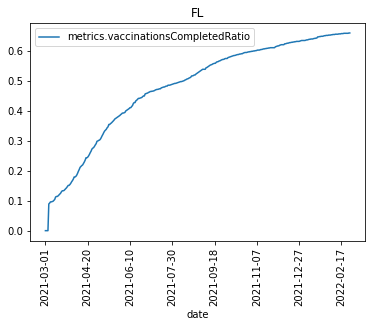

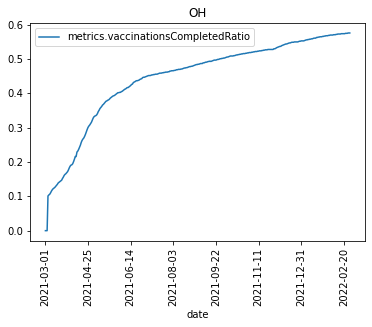

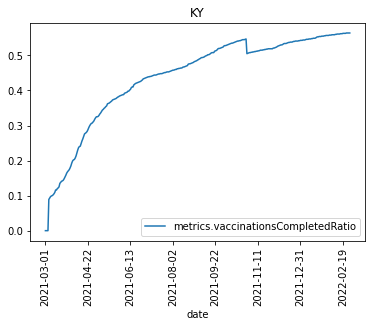

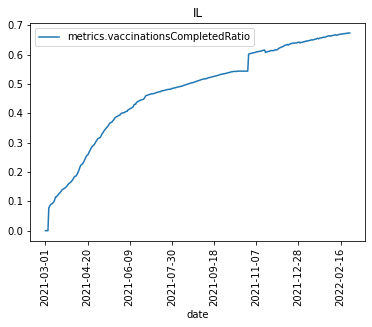

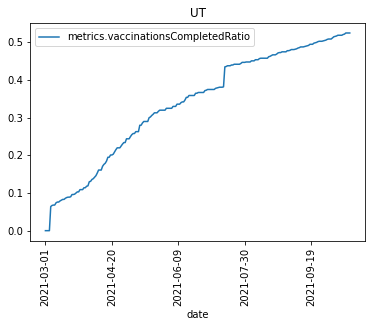

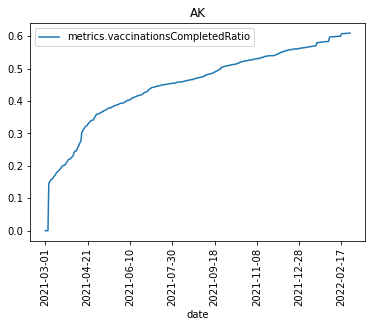

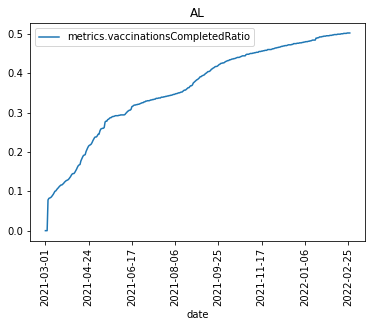

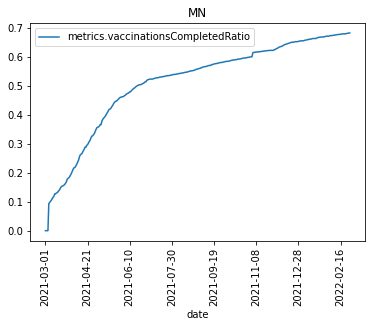

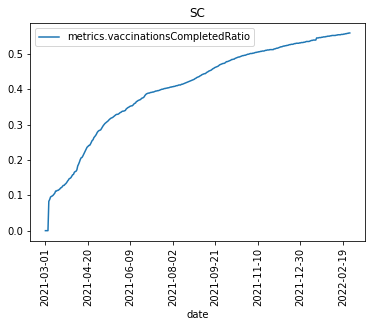

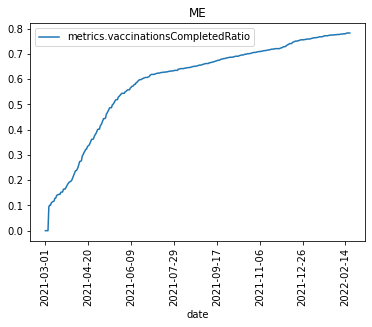

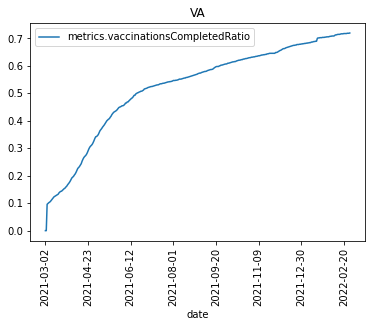

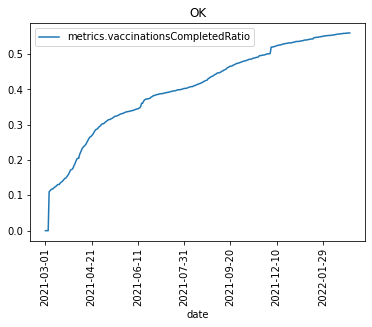

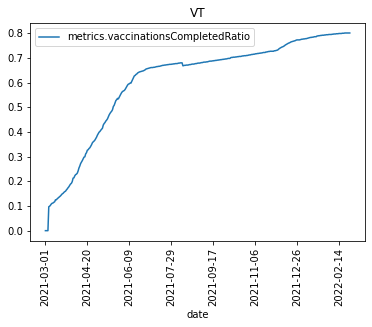

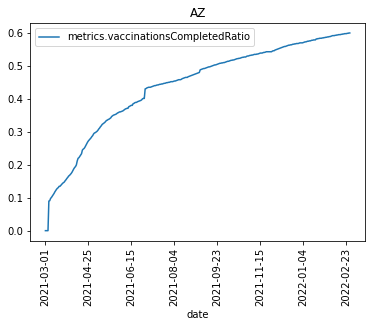

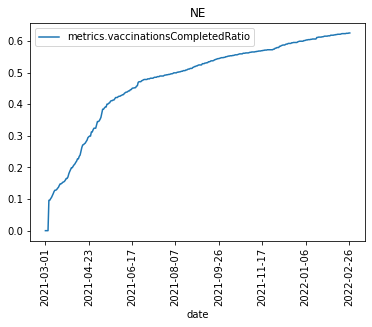

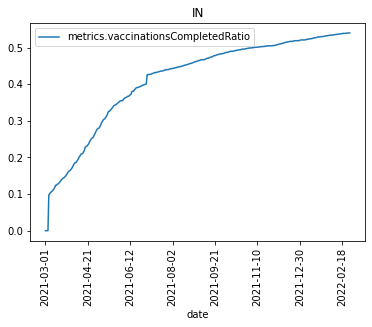

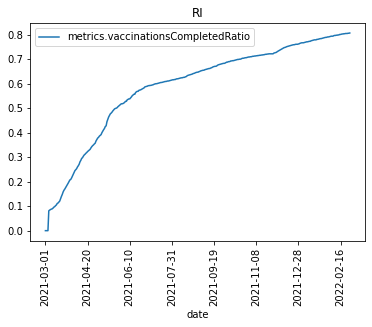

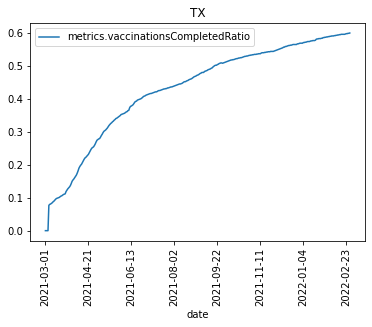

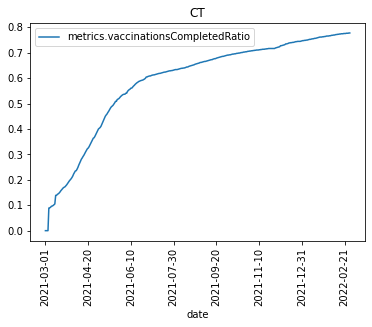

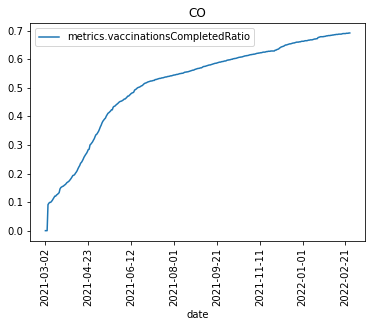

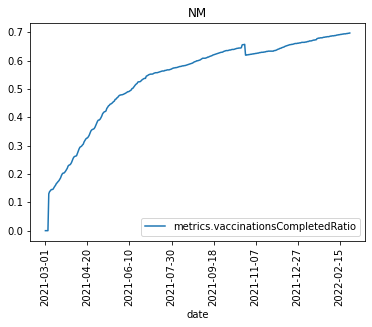

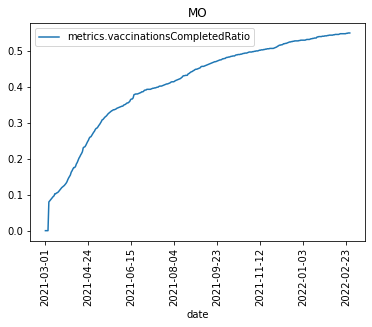

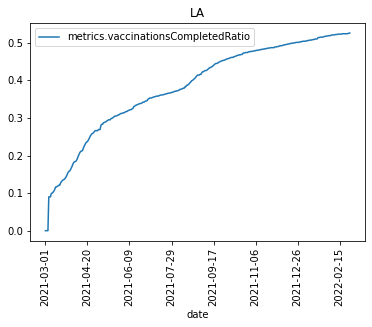

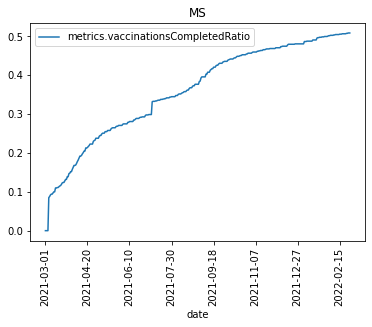

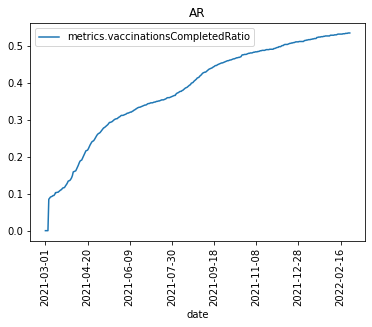

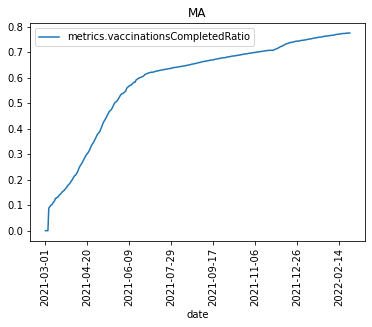

In [58]:
#plt.xticks(rotation = 90)
states = list(set(vaccination_data['state']))
for state in states:
    data = vaccination_data[vaccination_data['state'] == state]
    data.drop('state',axis = 1).plot(rot = 90, title = state);

### vaccination vs hospitalization

Question: Does the number of vaccinations affect the number of cases in the US?

- H_0 = number of vaccines did not affect number of covid cases. Higher % vaccination => lower hospitalization rate?
- H_A = number of vaccines did affect number of covid cases.


In [35]:
vaccination_state_data = df[['date','metrics.bedsWithCovidPatientsRatio','metrics.vaccinationsCompletedRatio']]
vaccination_state_data.head()

,date,metrics.bedsWithCovidPatientsRatio,metrics.vaccinationsCompletedRatio
0,2021-03-01,0.02,0.000
1,2021-03-02,0.02,0.000
2,2021-03-03,0.02,0.000
3,2021-03-04,0.02,0.000
4,2021-03-05,0.02,0.146


In [37]:
new_df = vaccination_state_data.groupby('date').mean()

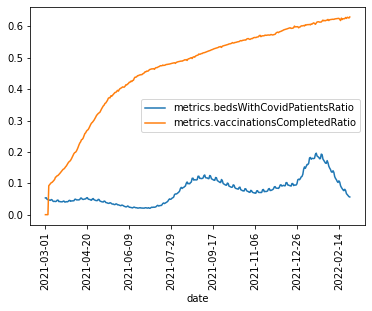

In [44]:
new_df.plot(rot = 90);

In [48]:
sample1 = new_df[new_df['metrics.vaccinationsCompletedRatio']<0.50]
sample2 = new_df[new_df['metrics.vaccinationsCompletedRatio']>=0.50]

In [53]:
from scipy.stats import ttest_ind
import numpy as np

sample1_mean = np.mean(sample1['metrics.bedsWithCovidPatientsRatio'])
sample2_mean = np.mean(sample2['metrics.bedsWithCovidPatientsRatio'])
print("sample1 mean hospitalization  ratio : ",sample1_mean)
print("sample2 mean hospitalization ratio : ",sample2_mean)

sample1_std = np.std(sample1['metrics.bedsWithCovidPatientsRatio'])
sample2_std = np.std(sample2['metrics.bedsWithCovidPatientsRatio'])
print("\nsample1 std hospitalization  ratio : ",sample1_std)
print("sample2 std hospitalization ratio : ",sample2_std)

ttest,pval = ttest_ind(sample1['metrics.bedsWithCovidPatientsRatio'],sample2['metrics.bedsWithCovidPatientsRatio'])
print("\np-value",np.round(pval,5))
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

sample1 mean hospitalization  ratio :  0.04326174222362293
sample2 mean hospitalization ratio :  0.10794775858691506

sample1 std hospitalization  ratio :  0.01928815915252693
sample2 std hospitalization ratio :  0.03411666617393542

p-value 0.0
we reject null hypothesis


### vaccination vs transmission

Question: Does the number of vaccinations affect the transmission rate of covid-19 virus in  US?

- H_0 = Vaccination does not prevent COVID-19 transmission.
- H_A = Vaccination helps prevent COVID-19 transmission 


In [65]:
vaccination_state_data = df[['date','metrics.infectionRate','metrics.vaccinationsCompletedRatio']]
vaccination_state_data.head()

,date,metrics.infectionRate,metrics.vaccinationsCompletedRatio
0,2021-03-01,0.99,0.000
1,2021-03-02,0.99,0.000
2,2021-03-03,0.99,0.000
3,2021-03-04,0.99,0.000
4,2021-03-05,0.99,0.146


<AxesSubplot:xlabel='date'>

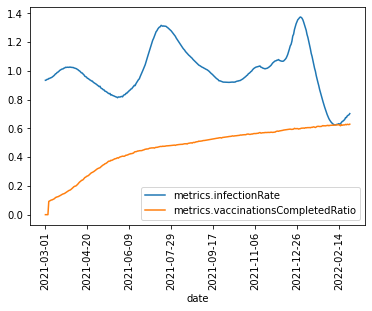

In [66]:
new_df = vaccination_state_data.groupby('date').mean()
new_df.plot(rot = 90)

In [67]:
sample1 = new_df[new_df['metrics.vaccinationsCompletedRatio']<0.50]
sample2 = new_df[new_df['metrics.vaccinationsCompletedRatio']>=0.50]

In [68]:
from scipy.stats import ttest_ind
import numpy as np

sample1_mean = np.mean(sample1['metrics.infectionRate'])
sample2_mean = np.mean(sample2['metrics.infectionRate'])
print("sample1 mean transmission  ratio : ",sample1_mean)
print("sample2 mean transmission ratio : ",sample2_mean)

sample1_std = np.std(sample1['metrics.infectionRate'])
sample2_std = np.std(sample2['metrics.infectionRate'])
print("\nsample1 std transmission  ratio : ",sample1_std)
print("sample2 std transmission ratio : ",sample2_std)

ttest,pval = ttest_ind(sample1['metrics.infectionRate'],sample2['metrics.infectionRate'])
print("\np-value",np.round(pval,5))
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

sample1 mean transmission  ratio :  1.0200663601867497
sample2 mean transmission ratio :  0.9787841052946713

sample1 std transmission  ratio :  0.15144698926427883
sample2 std transmission ratio :  0.183169787138022

p-value 0.02053
we reject null hypothesis


### Vaccination vs death rate

Question: Does the number of vaccinations affect the number of death in the US?

- H_0 = Vaccination does not prevent COVID-19 death.
- H_A = Vaccination helps prevent COVID-19 death 


In [70]:
vaccination_state_data = df[['date','actuals.newDeaths','metrics.vaccinationsCompletedRatio']]
vaccination_state_data.head()

,date,actuals.newDeaths,metrics.vaccinationsCompletedRatio
0,2021-03-01,10.0,0.000
1,2021-03-02,1.0,0.000
2,2021-03-03,1.0,0.000
3,2021-03-04,0.0,0.000
4,2021-03-05,1.0,0.146


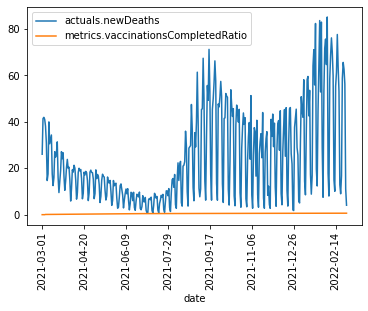

In [72]:
new_df = vaccination_state_data.groupby('date').mean()
new_df.plot(rot = 90);

In [73]:
sample1 = new_df[new_df['metrics.vaccinationsCompletedRatio']<0.50]
sample2 = new_df[new_df['metrics.vaccinationsCompletedRatio']>=0.50]

In [74]:
from scipy.stats import ttest_ind
import numpy as np

sample1_mean = np.mean(sample1['actuals.newDeaths'])
sample2_mean = np.mean(sample2['actuals.newDeaths'])
print("sample1 mean new Deaths : ",sample1_mean)
print("sample2 mean new Deaths : ",sample2_mean)

sample1_std = np.std(sample1['actuals.newDeaths'])
sample2_std = np.std(sample2['actuals.newDeaths'])
print("\nsample1 std new Deaths : ",sample1_std)
print("sample2 std new Deaths : ",sample2_std)

ttest,pval = ttest_ind(sample1['actuals.newDeaths'],sample2['actuals.newDeaths'])
print("\np-value",np.round(pval,5))
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

sample1 mean new Deaths :  13.363243368248419
sample2 mean new Deaths :  34.63927301980296

sample1 std new Deaths :  8.979557213492923
sample2 std new Deaths :  21.538807951422623

p-value 0.0
we reject null hypothesis


### results

from the above hypothesis testing we conclude that
- vaccination prevents new number of cases/hospitalization
- vaccination reduces transmission rate
- vaccination prevents new death

#### Machine Learning model

In [76]:
df.head()

,date,state,actuals.hospitalBeds.currentUsageCovid,actuals.newCases,metrics.infectionRate,metrics.vaccinationsCompletedRatio,actuals.newDeaths,metrics.weeklyNewCasesPer100k,metrics.bedsWithCovidPatientsRatio,actuals.hospitalBeds.weeklyCovidAdmissions,metrics.weeklyCovidAdmissionsPer100k,communityLevels.canCommunityLevel,state_name,population
0,2021-03-01,AK,25.0,383.0,0.99,0.000,10.0,124.8,0.02,25.0,3.4,0.0,Alaska,724357.0
1,2021-03-02,AK,27.0,154.0,0.99,0.000,1.0,138.3,0.02,23.0,3.1,0.0,Alaska,724357.0
2,2021-03-03,AK,34.0,191.0,0.99,0.000,1.0,140.0,0.02,26.0,3.6,0.0,Alaska,724357.0
3,2021-03-04,AK,32.0,148.0,0.99,0.000,0.0,134.9,0.02,24.0,3.3,0.0,Alaska,724357.0
4,2021-03-05,AK,36.0,148.0,0.99,0.146,1.0,140.0,0.02,25.0,3.4,0.0,Alaska,724357.0


In [77]:
new_df = df.drop(['date','state','state_name'],axis = 1)

In [78]:
X = new_df.drop('actuals.newCases',axis = 1)
y = new_df['actuals.newCases']

In [79]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train_std, y_train)

In [86]:
from sklearn.metrics import mean_absolute_error , r2_score

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)


print('Train mae ' , mean_absolute_error(y_train , y_train_pred))
print('Test mae ' , mean_absolute_error(y_test , y_test_pred))


print('Train r2_score ' , r2_score(y_train , y_train_pred))
print('Test r2_score ' , r2_score(y_test , y_test_pred))

Train mae  2045.3276568383997
Test mae  1965.5023084179722
Train r2_score  0.5425751194748853
Test r2_score  0.5715796747588674


In [87]:
y_train.mean()

2810.389128840355

In [88]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train_std, y_train)

In [89]:
from sklearn.metrics import mean_absolute_error , r2_score

y_train_pred = rf.predict(X_train_std)
y_test_pred = rf.predict(X_test_std)


print('Train mae ' , mean_absolute_error(y_train , y_train_pred))
print('Test mae ' , mean_absolute_error(y_test , y_test_pred))


print('Train r2_score ' , r2_score(y_train , y_train_pred))
print('Test r2_score ' , r2_score(y_test , y_test_pred))

Train mae  415.92859587645677
Test mae  1126.1616450745537
Train r2_score  0.960271037092236
Test r2_score  0.7012103529121392


In [94]:
rf_tuned = RandomForestRegressor(n_estimators=500 , max_depth=10).fit(X_train_std, y_train)

In [95]:
from sklearn.metrics import mean_absolute_error , r2_score

y_train_pred = rf_tuned.predict(X_train_std)
y_test_pred = rf_tuned.predict(X_test_std)


print('Train mae ' , mean_absolute_error(y_train , y_train_pred))
print('Test mae ' , mean_absolute_error(y_test , y_test_pred))


print('Train r2_score ' , r2_score(y_train , y_train_pred))
print('Test r2_score ' , r2_score(y_test , y_test_pred))

Train mae  746.3445787331272
Test mae  1153.5617361425052
Train r2_score  0.9405686871133558
Test r2_score  0.7002672249156188
